# Implementation of Isolation Forest using synthetic regression data

In [76]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [77]:
n_samples=1000
n_features=2
np.random.seed(42)
X=np.random.normal(loc=0,scale=1,size=(n_samples,n_features))

In [78]:
indices=np.random.choice(n_samples,size=20,replace=False)

In [79]:
##noise in 0th variable
X[indices, 0] = np.random.normal(loc=10, scale=2, size=len(indices))
labels = np.zeros(n_samples)
labels[indices] = -1
labels[labels == 0] = 1

In [80]:
feature_names = ['feature1', 'feature2']
df = pd.DataFrame(X, columns=feature_names)

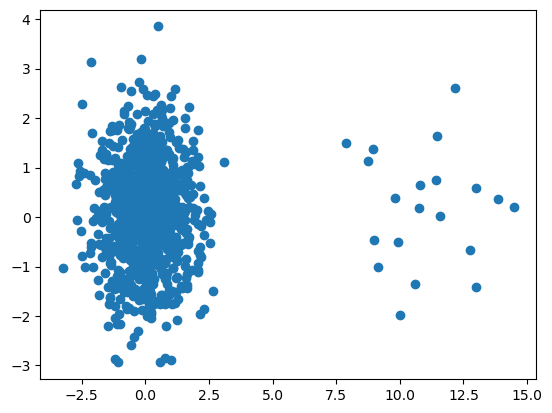

In [81]:
plt.scatter(df.iloc[:,0],df.iloc[:,1])

## Implementation of Isolation forest to detect anomalies

In [82]:
from sklearn.ensemble import IsolationForest

In [83]:
random_state = np.random.RandomState(42)
model=IsolationForest(n_estimators=100, contamination=float(0.1),random_state=random_state)
model.fit(df)
scores = model.decision_function(df)
predictions=model.predict(df)

In [84]:
df['scores']=scores
df['anomaly_score']=predictions
df[df['anomaly_score']==-1].head()

,feature1,feature2,scores,anomaly_score
37,-2.619745,0.821903,-0.076729,-1
39,0.091761,-1.987569,-0.000172,-1
56,0.060230,2.463242,-0.034106,-1
71,10.762296,0.184634,-0.195480,-1
89,-0.264657,2.720169,-0.069763,-1


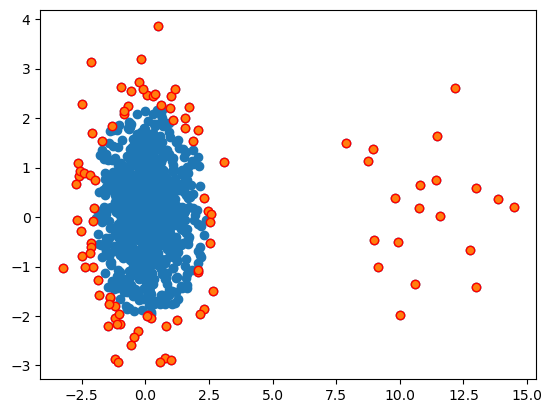

In [85]:
index=np.where(predictions<0)
x=df.values
plt.scatter(df.iloc[:,0],df.iloc[:,1])
plt.scatter(x[index,0],x[index,1],edgecolors="r")

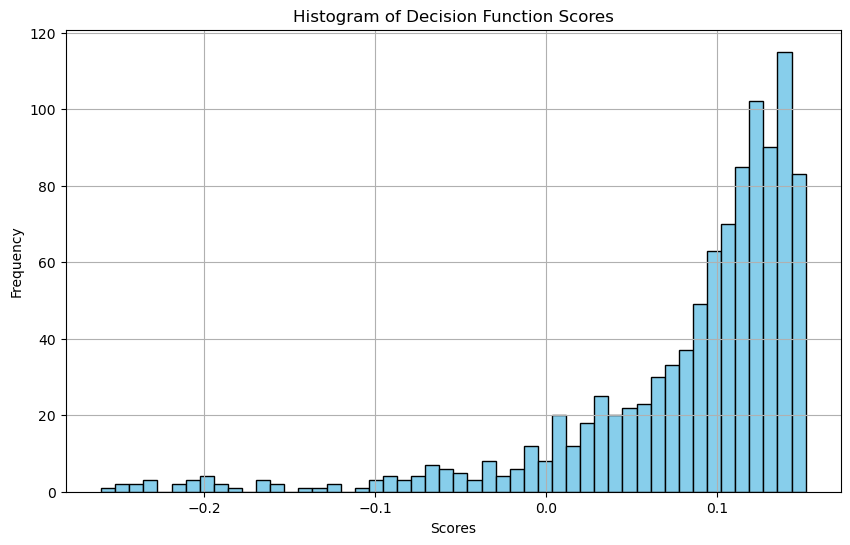

In [86]:
# Plot the scores
plt.figure(figsize=(10, 6))
plt.hist(scores, bins=50, color='skyblue', edgecolor='black')
plt.xlabel('Scores')
plt.ylabel('Frequency')
plt.title('Histogram of Decision Function Scores')
plt.grid(True)
plt.show()

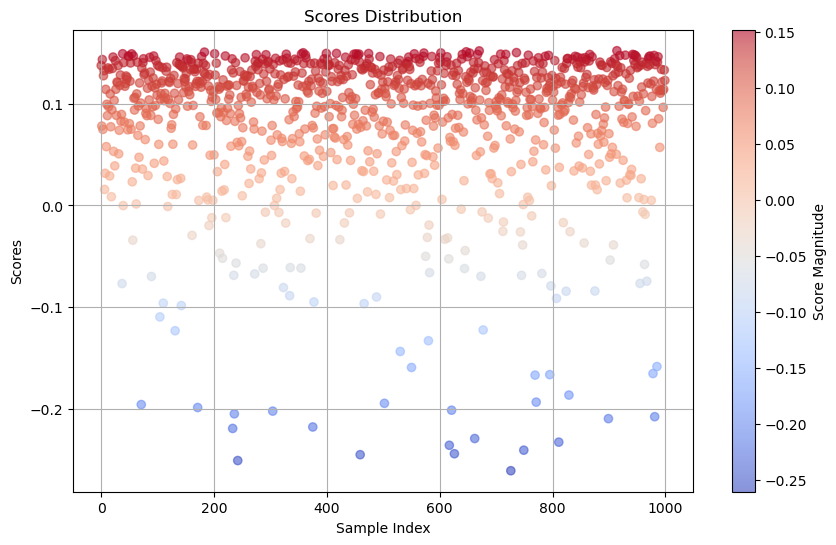

In [87]:
import matplotlib.pyplot as plt

# Plot the scores with a gradient colormap
plt.figure(figsize=(10, 6))
plt.scatter(range(len(scores)), scores, c=scores, cmap='coolwarm', alpha=0.6)
plt.colorbar(label='Score Magnitude')
plt.xlabel('Sample Index')
plt.ylabel('Scores')
plt.title('Scores Distribution')
plt.grid(True)
plt.show()

In [88]:
# Accuracy of detecting outliers
total_samples = len(labels)
correct_predictions = sum(1 for true, pred in zip(labels, df['anomaly_score']) if true == pred)
accuracy = correct_predictions / total_samples
accuracy

0.92

## The accuracy is 92%